In [1]:
#Arrtificial recurrent neural network called Long Short Term Memory (LSTM) to predict the closing stock price

In [2]:
#import libraries
import numpy as np
import pandas as pd
import math
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

C:\Users\sheha\anaconda3\envs\dojo-env\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\sheha\AppData\Local\Temp\ipykernel_19004\2877981152.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
#get the stock data
file = 'SPY_5Y_Daily_candle.xlsx'
df =  pd.read_excel(file, sheet_name = 'original')
df

,Date,Open,High,Low,Close,% Change,% Change vs Average,Volume
0,2019-02-05T08:00:00.000Z,272.44,273.44,271.88,273.10,0.4192,0.3630,79552774
1,2019-02-06T08:00:00.000Z,272.79,273.34,271.92,272.74,-0.1318,-0.1880,58347791
2,2019-02-07T08:00:00.000Z,270.94,271.55,268.29,270.14,-0.9533,-1.0100,95481961
3,2019-02-08T08:00:00.000Z,268.75,270.58,267.83,270.47,0.1222,0.0660,75788861
4,2019-02-11T08:00:00.000Z,271.20,271.49,270.03,270.62,0.0555,-0.0007,68021423
...,...,...,...,...,...,...,...,...
1255,2024-01-31T08:00:00.000Z,488.62,489.08,482.86,482.88,-1.6300,-1.6900,126011062
1256,2024-02-01T08:00:00.000Z,484.63,489.23,483.80,489.20,1.3100,1.2500,91891637
1257,2024-02-02T08:00:00.000Z,489.65,496.05,489.30,494.35,1.0500,0.9966,99228192
1258,2024-02-05T08:00:00.000Z,493.69,494.38,490.23,492.55,-0.3641,-0.4203,75757102


In [4]:
#Extract the date only from 1st column
df['Date'] = pd.to_datetime(df['Date']).dt.date

In [5]:
df

,Date,Open,High,Low,Close,% Change,% Change vs Average,Volume
0,2019-02-05,272.44,273.44,271.88,273.10,0.4192,0.3630,79552774
1,2019-02-06,272.79,273.34,271.92,272.74,-0.1318,-0.1880,58347791
2,2019-02-07,270.94,271.55,268.29,270.14,-0.9533,-1.0100,95481961
3,2019-02-08,268.75,270.58,267.83,270.47,0.1222,0.0660,75788861
4,2019-02-11,271.20,271.49,270.03,270.62,0.0555,-0.0007,68021423
...,...,...,...,...,...,...,...,...
1255,2024-01-31,488.62,489.08,482.86,482.88,-1.6300,-1.6900,126011062
1256,2024-02-01,484.63,489.23,483.80,489.20,1.3100,1.2500,91891637
1257,2024-02-02,489.65,496.05,489.30,494.35,1.0500,0.9966,99228192
1258,2024-02-05,493.69,494.38,490.23,492.55,-0.3641,-0.4203,75757102


In [6]:
#make 'Date' as index column
df.set_index('Date', inplace=True)
df

,Open,High,Low,Close,% Change,% Change vs Average,Volume
Date,,,,,,,
2019-02-05,272.44,273.44,271.88,273.10,0.4192,0.3630,79552774
2019-02-06,272.79,273.34,271.92,272.74,-0.1318,-0.1880,58347791
2019-02-07,270.94,271.55,268.29,270.14,-0.9533,-1.0100,95481961
2019-02-08,268.75,270.58,267.83,270.47,0.1222,0.0660,75788861
2019-02-11,271.20,271.49,270.03,270.62,0.0555,-0.0007,68021423
...,...,...,...,...,...,...,...
2024-01-31,488.62,489.08,482.86,482.88,-1.6300,-1.6900,126011062
2024-02-01,484.63,489.23,483.80,489.20,1.3100,1.2500,91891637
2024-02-02,489.65,496.05,489.30,494.35,1.0500,0.9966,99228192


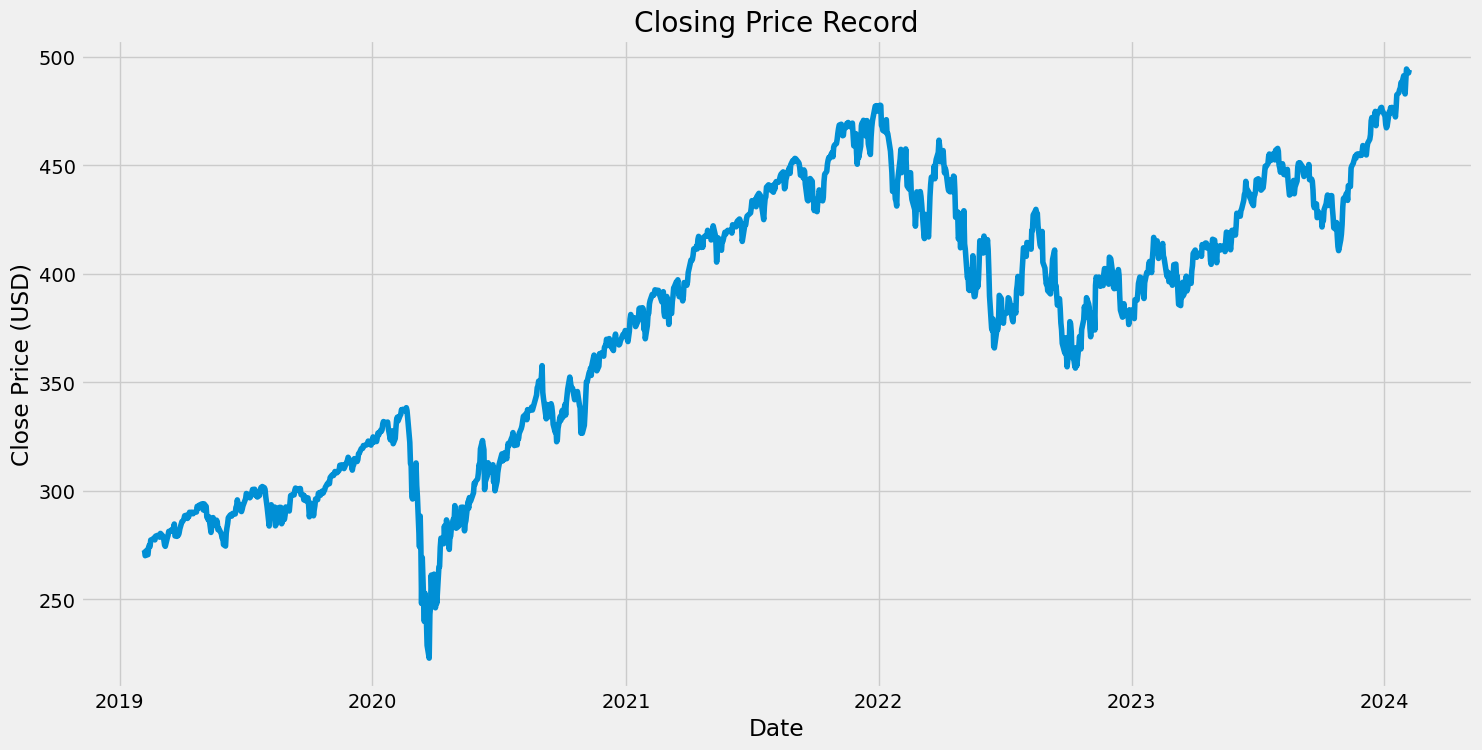

In [7]:
#Visualize the closing proce history
plt.figure(figsize=(16,8))
plt.title("Closing Price Record")
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.show()

In [8]:
#create new ddatafrma including "Close" column
data = df.filter(['Close'])
#convert dataframe into a numpy array
dataset = data.values
#calculate the number of training data
training_data_len = math.ceil(len(dataset)*0.8)
training_data_len

1008

In [9]:
#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.18478261],
       [0.18345615],
       [0.1738762 ],
       ...,
       [1.        ],
       [0.99336772],
       [0.9986367 ]])

In [10]:
#create training data
train_data = scaled_data[0:training_data_len,:]
train_data

#split data into x_train and y_train
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()

[array([0.18478261, 0.18345615, 0.1738762 , 0.17509211, 0.1756448 ,
       0.18846721, 0.1917465 , 0.18949889, 0.20051584, 0.20228445,
       0.20434783, 0.20070007, 0.20703758, 0.20843773, 0.20770081,
       0.20725866, 0.20534267, 0.21175387, 0.20799558, 0.20659543,
       0.20036846, 0.19182019, 0.18979366, 0.20445836, 0.20832719,
       0.2151437 , 0.21448047, 0.21503316, 0.21879145, 0.21904937,
       0.21591746, 0.22763449, 0.20744289, 0.20666912, 0.21433309,
       0.20891673, 0.2128224 , 0.21934414, 0.23168755, 0.23220339,
       0.23386146, 0.23666175, 0.24178335, 0.24259396, 0.23714075,
       0.24075166, 0.24045689, 0.24764186, 0.24694178, 0.24764186,
       0.24502579, 0.24712601, 0.24804716, 0.25766396, 0.25526898,
       0.25460575, 0.2596168 , 0.26131172, 0.26186441, 0.25372144])]
[0.2514001473839351]

[array([0.18478261, 0.18345615, 0.1738762 , 0.17509211, 0.1756448 ,
       0.18846721, 0.1917465 , 0.18949889, 0.20051584, 0.20228445,
       0.20434783, 0.20070007, 0.207

In [11]:
#convert the x_train and y-train to numpy array
x_train,y_train = np.array(x_train),np.array(y_train)

In [12]:
#reshape data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(948, 60, 1)

In [13]:
#build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences= True, input_shape= (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [14]:
#compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [15]:
#train the model
model.fit(x_train, y_train, batch_size =1, epochs=1)

948/948 [==============================] - 31s 29ms/step - loss: 0.0037


In [16]:
#create the testing data set with scaled data for later 20%
test_data = scaled_data[training_data_len-60:,:]
#creat
x_test = []
y_test= dataset[training_data_len:,:]

for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])
    

In [17]:
#convert the array into numpy array
x_test = np.array(x_test)
x_test.shape

(252, 60)

In [18]:
#reshape data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))


In [19]:
#get the model predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

8/8 [==============================] - 2s 23ms/step


In [20]:
#evaluate the model with RMSE
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

4.966147882370721

C:\Users\sheha\AppData\Local\Temp\ipykernel_19004\1874456672.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


<function matplotlib.pyplot.show(close=None, block=None)>

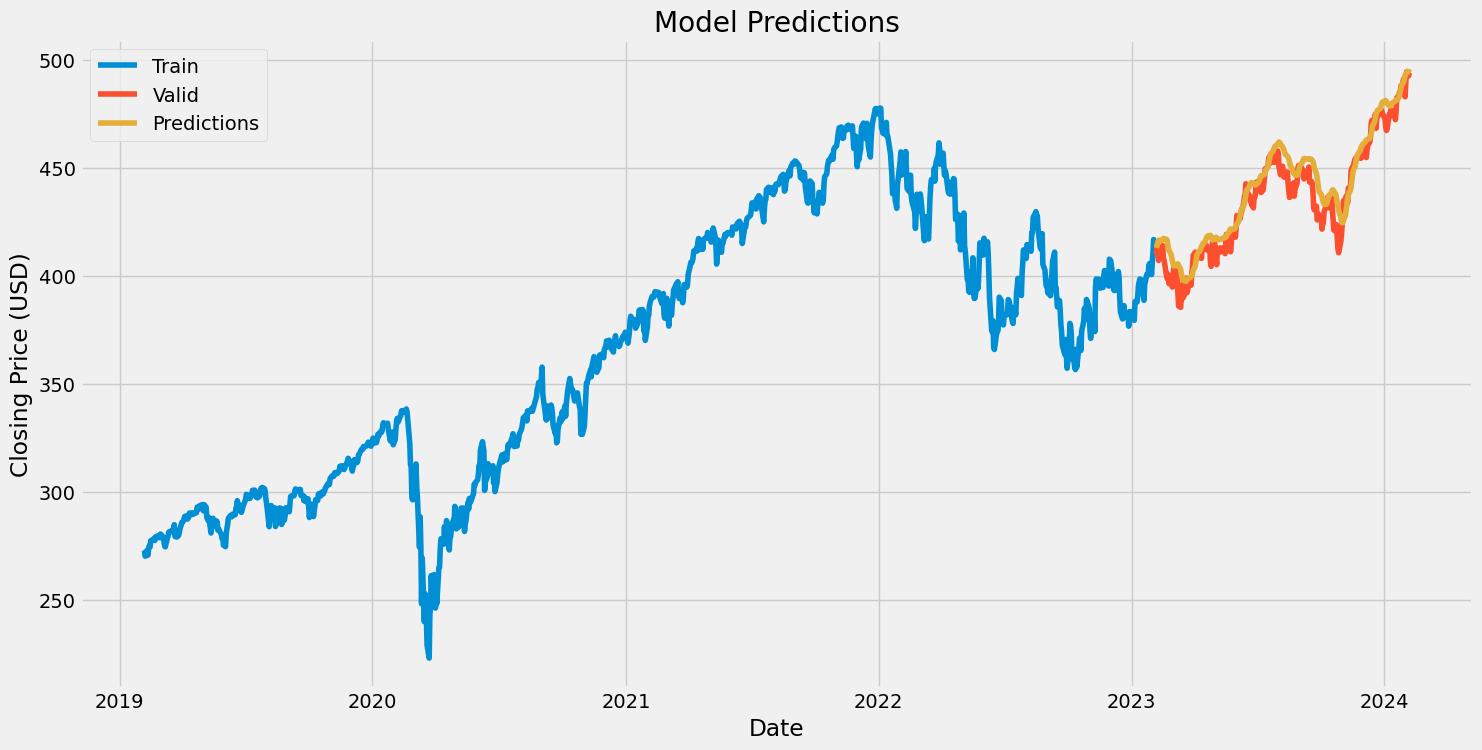

In [21]:
#plot data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#visualize data
plt.figure(figsize=(16,8))
plt.title('Model Predictions')
plt.xlabel("Date")
plt.ylabel('Closing Price (USD)')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Valid', 'Predictions'])
plt.show